In [1]:
%matplotlib inline


import cv2
import os
import numpy as np
from scipy import signal, misc, ndimage
from itertools import combinations
import math

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import sklearn.metrics as skmetrics
import pandas as pd

import import_ipynb
import PCA
import Morlet_wavelet_and_fast_scattering as fastscat

importing Jupyter notebook from PCA.ipynb
importing Jupyter notebook from Morlet_wavelet_and_fast_scattering.ipynb


# MORLET WAVELET 

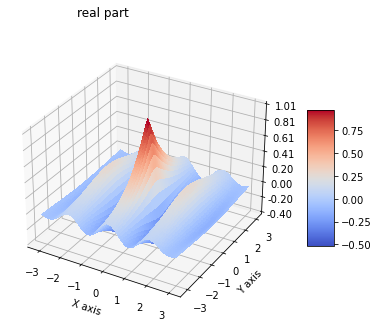

In [2]:
Z = fastscat.Morlet2D_grid(100, 100, 4, theta = 3*np.pi/4)
Z_r = np.real(Z)
Z_i = np.imag(Z)
X = np.arange(-100 / 32, 100 / 32, 1/16)
Y = np.arange(-100 / 32, 100 / 32, 1/16)
X, Y = np.meshgrid(X, Y)
fig = plt.figure(figsize= (10,5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z_r, rstride=1, cstride=1, cmap = cm.coolwarm,
        linewidth=0, antialiased=False)
ax.set_zlim(-0.4, 1.01)


ax.zaxis.set_major_locator(LinearLocator(8))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.suptitle("real part")
plt.show()

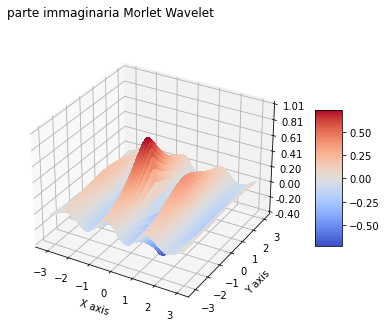

In [3]:
Z = fastscat.Morlet2D_grid(100, 100, 4, theta = 3*np.pi/4)
Z_r = np.real(Z)
Z_i = np.imag(Z)
X = np.arange(-100 / 32, 100 / 32, 1/16)
Y = np.arange(-100 / 32, 100 / 32, 1/16)
X, Y = np.meshgrid(X, Y)
fig = plt.figure(figsize= (10,5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z_i, rstride=1, cstride=1, cmap = cm.coolwarm,
        linewidth=0, antialiased=False)
ax.set_zlim(-0.4, 1.01)


ax.zaxis.set_major_locator(LinearLocator(8))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.suptitle("parte immaginaria Morlet Wavelet")
plt.show()

### CONVOLUTION

# MNIST DATASET

In [3]:
def load_spec_image(df,index):
    tmp = list(df.iloc[index])
    image = np.array(tmp[1:]).reshape(28,28)

    y = tmp[0]
    return image, y

In [4]:
def compose_dataset(df,nmb):
    indexes = np.arange(df.shape[0])
    indexes = np.random.permutation(indexes)
    X = []
    y = []
    
    for i in range(10):
        print(i)
        cont = 0
        for ind in indexes:
            if cont < nmb and df.iloc[ind]['5'] == i:
                img,lab = load_spec_image(df,ind)
                X.append(img)
                y.append(lab)
                cont = cont + 1 
    return X,y

In [5]:
train_df = pd.read_csv('mnist_train.csv')


In [6]:
x,y = compose_dataset(train_df,100)

0
1
2
3
4
5
6
7
8
9


In [7]:

image, lb = load_spec_image(train_df,564)


In [16]:
!pip install kymatio

In [17]:
import kymatio
from kymatio.numpy import Scattering2D
S = Scattering2D(J=2, shape=(32, 32))

# LICHEN DATASET

In [4]:
os.listdir('../../../data/train')

['Candelariella_reflexa',
 'Lecidella_elaeochroma',
 'Melanelixia_glabratula',
 'Ramalina_fastigiata',
 'Chrysothrix_candelaris',
 'flavoparmenia_soredians',
 'Physconia_grisea',
 'Flavoparmelia_caperata',
 'Phaeophyscia_orbicularis',
 'Physcia_biziana',
 'Candelariella_xanthostigma',
 'Lecanora_argentata',
 'Hyperphyscia_adglutinata',
 'Arthonia_radiata',
 'Lecanora_chlarotera',
 'Ramalina_farinacea',
 'Caloplaca_cerina',
 'Xanthomendoza_fulva',
 'Xanthomendoza_fallax',
 'Gyalolechia_flavorubescens']

In [5]:
# creo dict lichene--->indice
lista_licheni = os.listdir('../../../data/train')
lichen_dict = {}
lichen_dict_index = {}

for i,l in enumerate(lista_licheni):
    if i > 20:
        continue
    lichen_dict[l] = i
    lichen_dict_index[i] = l
    
    
pth = '../../../data/train'

x = []
y = []
for i,l in enumerate(lista_licheni):
    print(l)
    path_lichene = os.path.join(pth,l)
    immagini = os.listdir(path_lichene)
    for j, img in enumerate(immagini):
        if i >20:
            continue
        if '.jpg' not in img:
            continue
        pth_img = os.path.join(path_lichene,img)
        #apro immagine 
        im = cv2.imread(pth_img)
        im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        im = cv2.resize(im,(100,100))
        norm_img = np.zeros((100,100))
        #final_img = cv2.normalize(im,  norm_img, 0, 255, cv2.NORM_MINMAX)
        x.append(im)
        y.append(lichen_dict[l])
        

Candelariella_reflexa
Lecidella_elaeochroma
Melanelixia_glabratula
Ramalina_fastigiata
Chrysothrix_candelaris
flavoparmenia_soredians
Physconia_grisea
Flavoparmelia_caperata
Phaeophyscia_orbicularis
Physcia_biziana
Candelariella_xanthostigma
Lecanora_argentata
Hyperphyscia_adglutinata
Arthonia_radiata
Lecanora_chlarotera
Ramalina_farinacea
Caloplaca_cerina
Xanthomendoza_fulva
Xanthomendoza_fallax
Gyalolechia_flavorubescens


### CREATE DATASET 

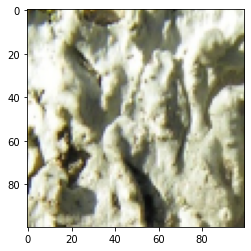

In [6]:
image = x[542]
plt.imshow(image)

Text(0.5, 0.98, 'different convlution for wavelets (on absolute value)')

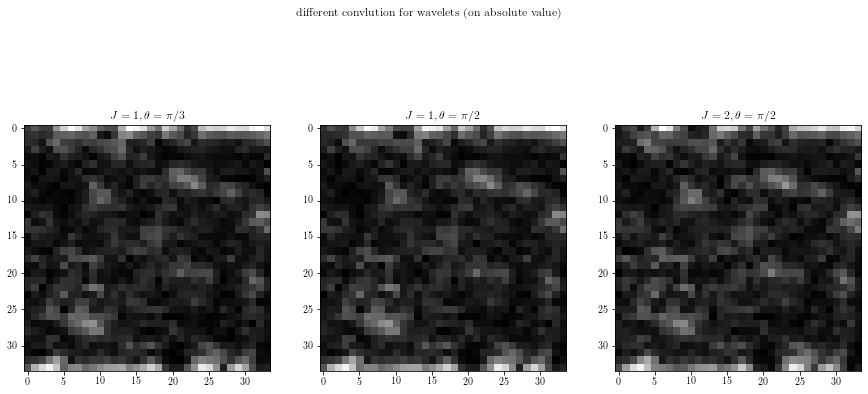

In [22]:
fig = plt.figure(figsize= (15,7))
f1 = np.abs(fastscat.morl_conv(image[:,:,0],subsample = 3, J = 1, theta = np.pi/3))
f2 = np.abs(fastscat.morl_conv(image[:,:,1], subsample = 3, J = 1, theta = np.pi/3))
f3 = np.abs(fastscat.morl_conv(image[:,:,2], subsample = 3, J = 1, theta = np.pi/3))

a = fig.add_subplot(1, 3, 1)
plt.imshow(f1, cmap = plt.cm.gray)
a.set_title(r"$J=1, \theta=\pi/3$")

a = fig.add_subplot(1, 3, 2)
plt.imshow(f2, cmap = plt.cm.gray)
a.set_title(r"$J=1, \theta=\pi/2$")

a = fig.add_subplot(1, 3, 3)
plt.imshow(f3, cmap = plt.cm.gray)
a.set_title(r"$J=2, \theta=\pi/2$")


fig.suptitle('different convlution for wavelets (on absolute value)')

# COMPUTING SCATERING COEFFICIENT

#### fast scattering transform with decreasing scales

In [7]:
%%time
a,b,c =  fastscat.scatter_coeffs_fast(image[:,:,0], 3, 6, J = 3)

CPU times: user 1.26 s, sys: 102 ms, total: 1.36 s
Wall time: 1.39 s


In [8]:
a.shape

(254887,)

## Scattering transform + SVM on MNIST database

In [9]:
%%time
x = np.array(x)
y = np.array(y)
X = []
d = {}
for i in range(x.shape[0]):

    xr = x[i,:,:,0]
    xg = x[i,:,:,1]
    xb = x[i,:,:,2]
    scat_coeff_r, coeff_index_r, norm_coeff_r = fastscat.scatter_coeffs_fast(xr, 2, K=4, J=2)
    scat_coeff_g, coeff_index_g, norm_coeff_g = fastscat.scatter_coeffs_fast(xg, 2, K=4, J=2)
    scat_coeff_b, coeff_index_b, norm_coeff_b = fastscat.scatter_coeffs_fast(xb, 2, K=4, J=2)
    
    scat_coeff =np.concatenate((scat_coeff_r,scat_coeff_g,scat_coeff_b))
    if i%10 == 0:
        print(i)
        print(scat_coeff.shape)
    #coeff_index = np.concatenate((coeff_index_r,coeff_index_g,coeff_index_b))
    #norm_coeff = np.concatenate((norm_coeff_r,norm_coeff_g,norm_coeff_b))
    
    
    X.append(scat_coeff)
    #for i in norm_coeff:
    #    if norm_coeff[i] > d.get(i,0):
    #        d[i] = norm_coeff[i]

X = np.array(X)
#X_normalized = X.copy()
#for i in coeff_index:
#    X_normalized[coeff_index[i][0]:coeff_index[i][1]] /= d[i]

0
(131403,)
10
(131403,)
20
(131403,)
30
(131403,)
40
(131403,)
50
(131403,)
60
(131403,)
70
(131403,)
80
(131403,)
90
(131403,)
100
(131403,)
110
(131403,)
120
(131403,)
130
(131403,)
140
(131403,)
150
(131403,)
160
(131403,)
170
(131403,)
180
(131403,)
190
(131403,)
200
(131403,)
210
(131403,)
220
(131403,)
230
(131403,)
240
(131403,)
250
(131403,)
260
(131403,)
270
(131403,)
280
(131403,)
290
(131403,)
300
(131403,)
310
(131403,)
320
(131403,)
330
(131403,)
340
(131403,)
350
(131403,)
360
(131403,)
370
(131403,)
380
(131403,)
390
(131403,)
400
(131403,)
410
(131403,)
420
(131403,)
430
(131403,)
440
(131403,)
450
(131403,)
460
(131403,)
470
(131403,)
480
(131403,)
490
(131403,)
500
(131403,)
510
(131403,)
520
(131403,)
530
(131403,)
540
(131403,)
550
(131403,)
560
(131403,)
570
(131403,)
580
(131403,)
590
(131403,)
600
(131403,)
610
(131403,)
620
(131403,)
630
(131403,)
640
(131403,)
650
(131403,)
660
(131403,)
670
(131403,)
680
(131403,)
690
(131403,)
700
(131403,)
710
(131403,)
720

In [13]:
# PCA REDUCTION 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=10, shuffle=True)


In [ ]:
X_tr, X_ts = PCA.apply_pca_to_train_and_test_images(X_train, X_test)

In [12]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix
svc  = OneVsRestClassifier(SVC(kernel = 'rbf',gamma = 'scale'),n_jobs = -1)
svc = svc.fit(X_train, y_train)

In [30]:
linear_score = svc.score(X_ts,y_test)
linear_score

0.26385542168674697

In [31]:
# First grid search to find best parameters
param_grid = {'C': [ 1e2, 1e3, 5e3, 1e4, 5e4], 'gamma': [ 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 0.0001, 0.0005, 0.001, 0.005]}
clf0 = GridSearchCV(SVC(kernel='rbf'), param_grid)
clf = clf0.fit(X_tr, y_train)
print("Best estimator found by grid search : ", clf.best_estimator_)

Best estimator found by grid search :  SVC(C=100.0, gamma=1e-07)


In [32]:
y_pred = svc.predict(X_ts)
print('Accuracy score :', skmetrics.accuracy_score(y_pred, y_test))
print( skmetrics.confusion_matrix(y_pred, y_test))

Accuracy score : 0.26385542168674697
[[ 6  0  7  1  6  3  4  2  2  2  5  2  2  0  0  1  0  4  4  6]
 [ 0  4  4  2  0  2  1  2  4  0  1  0  0  0  0  4  2  1  0  1]
 [ 0  2 13  2  1  1  1  1  2  0  2  1  2  0  0  4  2  5  0  1]
 [ 0  0  1  1  0  0  0  1  1  0  0  0  0  0  0  1  0  0  0  0]
 [ 4  0  0  0 26  0  0  1  2  0  5  0  1  0  0  0  5  6  5  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  1  1  0  2  0  0  0  0]
 [ 1  1  3  2  0  1  4  0  2  5  0  2  1  0  5  1  4  0  0  5]
 [ 1  1  0  0  0  3  3  4  1  1  0  0  0  1  2  2  0  0  0  0]
 [ 1  0  0  1  0  0  3  0  2  0  0  3  1  0  0  0  2  0  0  1]
 [ 0  8  1  0  0  0  0  0  0 10  0  0  0  0  0  3  0  0  0  0]
 [ 1  1  0  2  0  1  0  0  2  0  6  1  2  3  0  1  5  0  2  0]
 [ 0  1  0  0  0  0  0  1  0  5  0 11  4  0  0  1  0  0  0  2]
 [ 6  2 13  1  1  4  7  7  9  9  0  6 13  0  3  6  2  1  0  1]
 [ 2  9  0 13  0 10  1  3  9  0  2  0  2 29  2  8  7  0  1  7]
 [ 5  5  3 16  2 12 16 14  7  7  0 18  5  3 39 13  6  1  0  2]
 [ 0  0  0  0  0  

In [ ]:
def plot_confusion_matrix(cm, classes,string,directory,normalize=True,title='Confusion matrix'):
    """
    Function which plots confusion matrix

    Input cm = confusion matrix
    Input classes = array with class labels
    Input string = string to give name of the saved image
    Input directory = string to give directory to save the image
    Input normalize (False) = If true function will give accuracy instead of pure number
    Input Title (Confusion matrix) = title of the image


    Output : None
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if(i==j):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            continue

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig(directory +'confusion_matrix'+string+'.jpg')


In [ ]:

import itertools
plt.figure(figsize = (15,10)) 
plot_confusion_matrix(skmetrics.confusion_matrix(y_pred, y_test),lista_licheni,'_342_','confusion_matrix/')